In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
store = pd.read_csv('CAstore.csv')
store = store.sort_values(by='기준_년_코드', axis=0, ascending=True)
store

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명_구,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,폐업_률
555240,2020_1,A,골목상권,1000001,종로구,계동길,CS100001,한식음식점,19,19,5
493829,2020_1,A,골목상권,1000993,강동구,올림픽로48길,CS200043,건축물청소,1,1,0
493830,2020_1,A,골목상권,1000993,강동구,올림픽로48길,CS200042,통번역서비스,1,1,0
493831,2020_1,A,골목상권,1000993,강동구,올림픽로48길,CS200041,사진관,5,5,0
493832,2020_1,A,골목상권,1000993,강동구,올림픽로48길,CS200037,노래방,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
61950,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200033,부동산중개업,0,0,0
61951,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200032,가전제품수리,3,3,0
61952,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200031,세탁소,1,2,0
61954,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200023,통신기기수리,0,0,0


In [73]:
#input: 관심 업종
#ouput
# 1. 해당 업종 밀집 상권 top3, 해당 상권에서의 해당 업종 폐업률 (o)
# 2. (사용자 거주 구 이내) 해당 업종 점포 수가 0인 상권 목록 (o)
# 3. top3 상권에서의 업종 점포수 시계열 변화 (o)
# 4. top3 상권의 생활인구 분포
# 5. low3 상권의 생활인구 분포

In [4]:
#2021-2분기 데이터셋
latest_df = store[store['기준_년_코드'] == '2021_2']
latest_df

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명_구,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,폐업_률
30969,2021_2,A,골목상권,1000992,강동구,양재대로96길,CS300035,인테리어,5,5,0
30970,2021_2,A,골목상권,1000992,강동구,양재대로96길,CS300033,철물점,3,3,0
30971,2021_2,A,골목상권,1000992,강동구,양재대로96길,CS300032,가전제품,0,0,0
30972,2021_2,A,골목상권,1000992,강동구,양재대로96길,CS300031,가구,2,2,0
30973,2021_2,A,골목상권,1000992,강동구,양재대로96길,CS300028,화초,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
61950,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200033,부동산중개업,0,0,0
61951,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200032,가전제품수리,3,3,0
61952,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200031,세탁소,1,2,0
61954,2021_2,A,골목상권,1000507,양천구,가로공원로58길,CS200023,통신기기수리,0,0,0


In [75]:
# 1. 해당 업종 밀집 상권 top3, 해당 상권에서의 해당 업종 폐업률

#인풋으로 업종명 검색받음
#2021-2 데이터셋에서 해당 업종명만 필터링
#유사업종점포수가 가장 높고/낮은 상권코드명 필터링
#해당 상권의 상권코드 추출하기

exinput = '주유소'
exdf_latest = latest_df[latest_df['서비스_업종_코드_명'] == exinput].sort_values('유사_업종_점포_수', axis=0, ascending=False)
exdf_latest = exdf_latest.iloc[0:3,:]
exdf_latest

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명_구,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,폐업_률
50124,2021_2,A,골목상권,1000696,영등포구,대림로44길,CS300042,주유소,9,9,0
60341,2021_2,A,골목상권,1000532,양천구,신목로5길,CS300042,주유소,7,7,0
37162,2021_2,A,골목상권,1000904,강남구,도곡로37길,CS300042,주유소,6,6,0


In [76]:
extop5list= exdf_latest['상권_코드_명'].tolist()
extop5list

['대림로44길', '신목로5길', '도곡로37길']

In [77]:
#인풋 업종에 대한 전체 시기 데이터만 필터링

exdf = store[store['서비스_업종_코드_명'] == exinput]
exdf

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명_구,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,폐업_률
493871,2020_1,A,골목상권,1000992,강동구,양재대로96길,CS300042,주유소,0,0,0
493735,2020_1,A,골목상권,1000994,강동구,올림픽로71길,CS300042,주유소,1,1,0
493794,2020_1,A,골목상권,1000993,강동구,올림픽로48길,CS300042,주유소,1,1,0
493940,2020_1,A,골목상권,1000991,강동구,양재대로95길,CS300042,주유소,0,0,0
494445,2020_1,A,골목상권,1000984,강동구,성안로3길,CS300042,주유소,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
63364,2021_2,A,골목상권,1000484,마포구,성산로4길,CS300042,주유소,3,3,33
61247,2021_2,A,골목상권,1000518,양천구,목동남로4길,CS300042,주유소,2,2,0
62156,2021_2,A,골목상권,1000503,마포구,월드컵로7길,CS300042,주유소,1,1,0
62280,2021_2,A,골목상권,1000501,마포구,월드컵로25길,CS300042,주유소,0,0,0


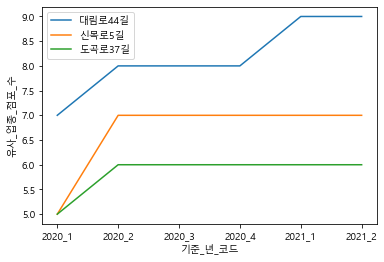

In [78]:
# 3. top3 상권에서의 업종 점포수 시계열 변화

for place in extop5list:
    sns.lineplot(data = exdf[exdf['상권_코드_명'] == place], x='기준_년_코드', y='유사_업종_점포_수')
plt.legend(extop5list)

In [5]:
############## 실제 쿼리 ################

ind = input('상권 분석을 원하는 업종명을 입력하세요: ')
district = input('본인이 거주하고있는 구를 입력하세요: ')

ind_lat = latest_df[latest_df['서비스_업종_코드_명'] == ind].sort_values('유사_업종_점포_수', axis=0, ascending=False)
ind_lat_t = ind_lat.iloc[0:3,:]

top3_name = ind_lat_t['상권_코드_명'].tolist()
top3_stnum = ind_lat_t['유사_업종_점포_수'].tolist()
top3_closer = ind_lat_t['폐업_률'].tolist()

# 1
print()
print('검색하신 업종 <%s>(이)가 현재 가장 밀집된 상권은'%ind)
print('[%s] 유사 업종 점포 개수: %d,   폐업률(반올림/버림): %d'%(top3_name[0], top3_stnum[0], top3_closer[0]))
print('[%s] 유사 업종 점포 개수: %d,   폐업률(반올림/버림): %d'%(top3_name[1], top3_stnum[1], top3_closer[1]))
print('[%s] 유사 업종 점포 개수: %d,   폐업률(반올림/버림): %d'%(top3_name[2], top3_stnum[2], top3_closer[2]))

상권 분석을 원하는 업종명을 입력하세요: 가전제품
본인이 거주하고있는 구를 입력하세요: 용산구

검색하신 업종 <가전제품>(이)가 현재 가장 밀집된 상권은
[용산 전자상가_1] 유사 업종 점포 개수: 163,   폐업률(반올림/버림): 0
[강변역] 유사 업종 점포 개수: 132,   폐업률(반올림/버림): 1
[종로 청계 관광특구] 유사 업종 점포 개수: 109,   폐업률(반올림/버림): 3


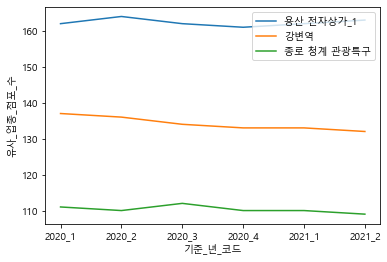

In [6]:
# 3
ind_df = store[store['서비스_업종_코드_명'] == ind] #인풋 업종에 대한 전체 시기 데이터 필터링

for place in top3_name:
    sns.lineplot(data = ind_df[ind_df['상권_코드_명'] == place], x='기준_년_코드', y='유사_업종_점포_수')
plt.legend(top3_name)

In [7]:
# 2
ind_lat_l = ind_lat[ind_lat['상권_코드_명_구'] == district][ind_lat['유사_업종_점포_수'] == 0]

low3_name = ind_lat_l['상권_코드_명'].tolist()

print()
print('검색하신 업종 <%s>(이)가 현존하지 않는 상권은'%ind)
print(low3_name, '입니다.')


검색하신 업종 <가전제품>(이)가 현존하지 않는 상권은
['신흥시장', '용문전통시장', '만리시장', '이촌종합시장', '후암시장', '보광시장', '서빙고로71길', '장문로45길', '청파로47나길', '이태원로27길', '녹사평대로46길', '녹사평대로26길', '소월로20길', '청파로73길', '한남대로20길', '효창원로39길', '회나무로13길', '효창원로93길'] 입니다.


<ipython-input-7-c19948bc94d8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ind_lat_l = ind_lat[ind_lat['상권_코드_명_구'] == district][ind_lat['유사_업종_점포_수'] == 0]


In [ ]:
#생활인구 데이터셋
pop = pd.read_csv('CApopulation.csv')
pop = pop[pop['기준_년_코드'] == '2021_2']
pop

In [ ]:
sexcol = ['남성', '여성']
agecol = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

sns.barplot(x=sexcol, y=sex_list)

In [11]:
ind_lat

,기준_년_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명_구,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,폐업_률
19497,2021_2,D,발달상권,1001145,용산구,용산 전자상가_1,CS300032,가전제품,163,163,0
19081,2021_2,D,발달상권,1001152,광진구,강변역,CS300032,가전제품,132,132,1
193,2021_2,U,관광특구,1001494,종로구,종로 청계 관광특구,CS300032,가전제품,109,109,3
386,2021_2,U,관광특구,1001492,중구,명동 남대문 북창동 다동 무교동 관광특구,CS300032,가전제품,76,76,1
18877,2021_2,D,발달상권,1001155,용산구,용산 전자상가_5,CS300032,가전제품,58,58,2
...,...,...,...,...,...,...,...,...,...,...,...
80317,2021_2,A,골목상권,1000205,동대문구,전농로4길,CS300032,가전제품,0,0,0
79953,2021_2,A,골목상권,1000212,동대문구,천호대로77길,CS300032,가전제품,0,0,0
79895,2021_2,A,골목상권,1000213,동대문구,천호대로97길,CS300032,가전제품,0,0,0
80114,2021_2,A,골목상권,1000209,동대문구,천호대로12길,CS300032,가전제품,0,0,0
